<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Ortiz Núñez, Caroline Michelle** 

**18-02-2021**

<font color='red'>NO AGREGUE NUEVAS CELDAS, UTILICE ÚNICAMENTE LAS QUE ESTÁN CREADAS</font>


### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dosfunciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [2]:
# Escriba aquí su código para el ejercicio 1
def download_pubmed (keyword):
    """
    Se muestra el resultado de todas las Id  
    """
    from Bio import Entrez
    from Bio import SeqIO
    from Bio import GenBank 
    Entrez.email = 'caroline.ortiz@est.ikiam.edu.ec'
    handle = Entrez.esearch(db='pubmed',
                        sort='relevance',
                        retmax='200',
                        retmode='xml',
                        term=keyword)
    total = Entrez.read(handle)
    listade_id = total["IdList"]
    ids = ','.join(listade_id)
    Entrez.email = 'caroline.ortiz@est.ikiam.edu.ec'
    handle = Entrez.efetch(db='pubmed',
                       retmode='xml',
                       id=ids)
    lista_id = ids.split(",")
    return (lista_id) 


import csv 
import re
import pandas as pd 
from collections import Counter

def mining_pubs(tipo):
    """
    Se muestra la funcion mining_pubs en donde usa tres variables que pueden ser "DP", "AU" y "AD" y da el resultado un dataframe
    """
    with open("data/pubmed-EcuadorGen-set.txt", errors="ignore") as f: 
        texto = f.read() 
    if tipo == "DP":
        PMID = re.findall("PMID- (\d*)", texto) 
        year = re.findall("DP\s{2}-\s(\d{4})", texto)
        pmid_y = pd.DataFrame()
        pmid_y["PMID"] = PMID
        pmid_y["Año de publicación"] = year
        return (pmid_y)
    elif tipo == "AU": 
        PMID = re.findall("PMID- (\d*)", texto) 
        autores = texto.split("PMID- ")
        autores.pop(0)
        num_autores = []
        for i in range(len(autores)):
            numero = re.findall("AU -", autores[i])
            n = (len(numero))
            num_autores.append(n)
        pmid_a = pd.DataFrame()
        pmid_a["PMID"] = PMID 
        pmid_a["Numero de autores"] = num_autores
        return (pmid_a)
    elif tipo == "AD": 
        texto = re.sub(r" [A-Z]{1}\.","", texto)
        texto = re.sub(r"Av\.","", texto)
        texto = re.sub(r"Vic\.","", texto)
        texto = re.sub(r"Tas\.","", texto)
        AD = texto.split("AD  - ")
        n_paises = []
        for i in range(len(AD)): 
            pais = re.findall("\S, ([A-Za-z]*)\.", AD[i])
            if not pais == []: 
                if not len(pais) >= 2:  
                    if re.findall("^[A-Z]", pais[0]): 
                        n_paises.append(pais[0])
        conteo=Counter(n_paises)
        resultado = {}
        for clave in conteo:
            valor = conteo[clave]
            if valor != 1: 
                resultado[clave] = valor 
        veces_pais = pd.DataFrame()
        veces_pais["pais"] = resultado.keys()
        veces_pais["numero de autores"] = resultado.values()
        return (veces_pais)

import miningscience as msc 
help(download_pubmed)
help(mining_pubs)


Help on function download_pubmed in module __main__:

download_pubmed(keyword)
    Se muestra el resultado de todas las Id

Help on function mining_pubs in module __main__:

mining_pubs(tipo)
    Se muestra la funcion mining_pubs en donde usa tres variables que pueden ser "DP", "AU" y "AD" y da el resultado un dataframe




## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador proteomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [3]:
# Escriba aquí su código para el ejercicio 2
## Usamos la funcion len para contar el numero de articulos de nuestr paper
paper = download_pubmed("Ecuador Genomics")

print ("El numero de articulos es:", len(paper)) 

print ("El PMID del primer articulo es:", paper[0])



El numero de articulos es: 193
El PMID del primer articulo es: 31822297


## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [4]:
# Escriba aquí su código para el ejercicio 3
import miningscience as msc
pub_año = msc.mining_pubs("DP")
print (pub_año.iloc[0:5])
print (pub_año.iloc[550:])
pub_autor = msc.mining_pubs("AU")
print (pub_autor.iloc[0:5])
print (pub_autor.iloc[550:])
countries = msc.mining_pubs("AD")
print (countries.iloc[0:5])
print (countries.iloc[114:])

       PMID Año de publicación
0  19844075               2010
1  31822297               2019
2  29632024               2018
3  32623267               2020
4  27577878               2017
         PMID Año de publicación
550  28598979               2017
551  29662497               2018
552  26217358               2015
553  32931955               2020
554  35064679               2022
..        ...                ...
823  32917887               2020
824  33634602               2021
825  28785301               2017
826  27429642               2016
827  31891233               2020

[278 rows x 2 columns]
       PMID  Numero de autores
0  19844075                  2
1  31822297                  3
2  29632024                 33
3  32623267                 15
4  27577878                 93
         PMID  Numero de autores
550  28598979                 13
551  29662497                 15
552  26217358                  5
553  32931955                 14
554  35064679                  7
..        

## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


La media es:  2014.87077294686
La desviación estandar es:  6.804327940706898


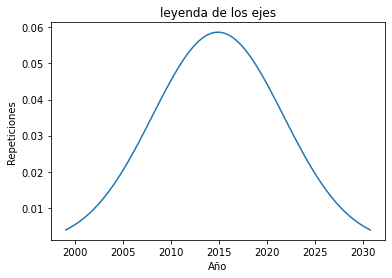

In [20]:
# Escriba aquí su código para el ejercicio 4
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import scipy
from scipy import stats
pub_año["Año de publicación"] = pub_año["Año de publicación"].astype("int")
mean_py = pub_año["Año de publicación"].mean()
sd_py = pub_año["Año de publicación"].std()
print ("La media es: ", mean_py)
print ("La desviación estandar es: ", sd_py)

mu, sigma = 2014.87077294686 , 6.804327940706898 # media y desvio estandar
normal = stats.norm(mu, sigma)
x = np.linspace(normal.ppf(0.01),
                normal.ppf(0.99), 100)
fp = normal.pdf(x) # Función de Probabilidad
plt.plot(x, fp)
plt.title('leyenda de los ejes')
plot.xlabel("Año")
plot.ylabel("Repeticiones")
plt.show()


         PMID  Numero de autores
0    19844075                  2
1    31822297                  3
2    29632024                 33
3    32623267                 15
4    27577878                 93
..        ...                ...
823  32917887                 30
824  33634602                102
825  28785301                173
826  27429642                173
827  31891233                728

[828 rows x 2 columns]


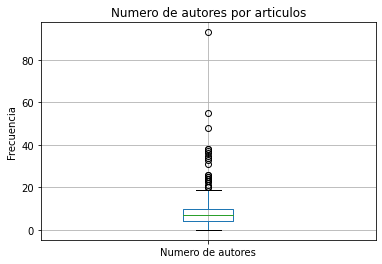

In [16]:
# Lista de número de autores 
boxplot = pub_autor[0:572].boxplot(column=["Numero de autores"])
plot.title("Numero de autores por articulos")
plot.ylabel("Frecuencia")
print (pub_autor)

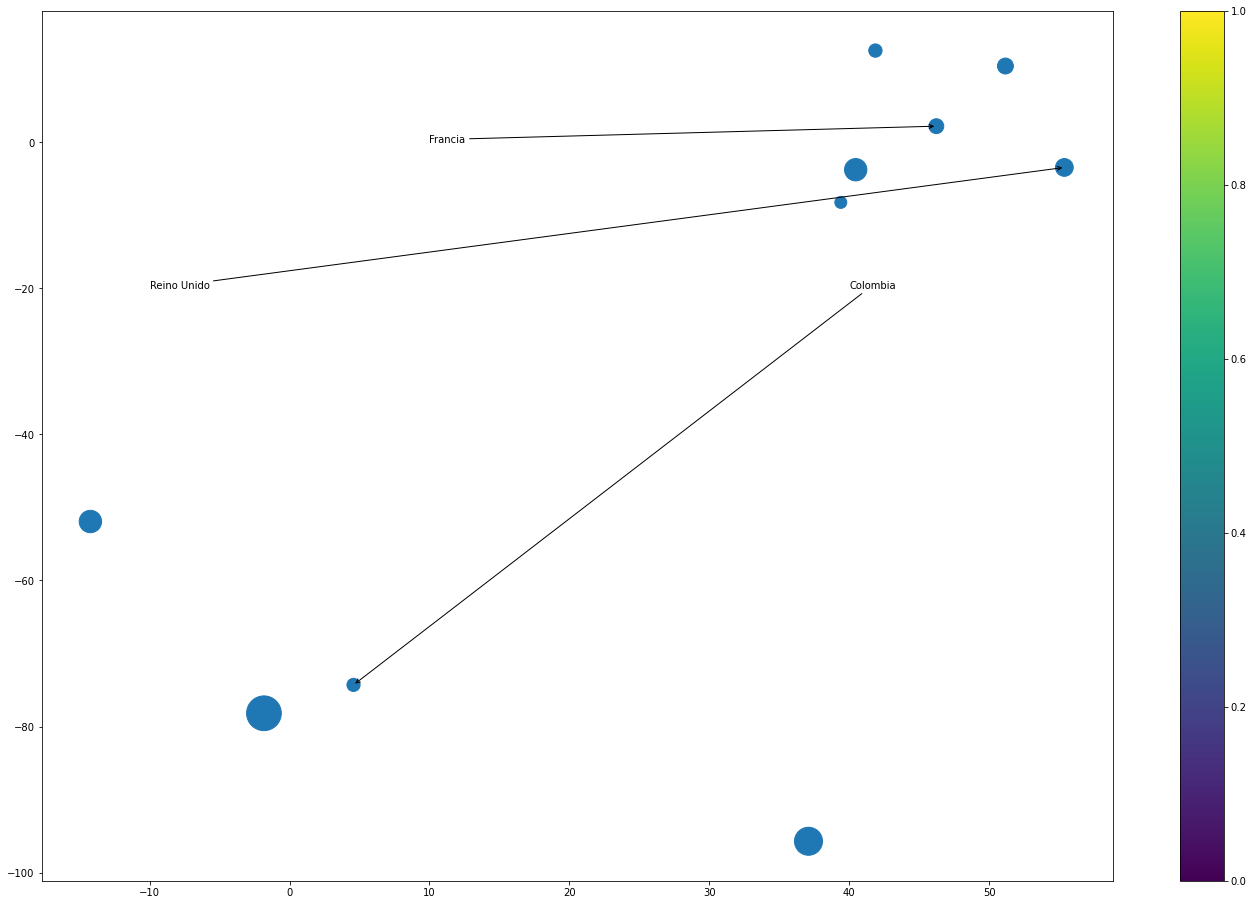

In [7]:
# Mapa 
countries = countries.sort_values("numero de autores")
max_pais = (countries[100:])

countries_lat = [39.399872, 4.570868, 41.87194, 46.227638, 51.165691, 55.378051, 
                40.463667, -14.235004, 37.09024, -1.831239  ] 
                 
countries_long = [-8.224454, -74.297333, 12.56738, 2.213749, 10.451526, -3.435973,  
                 -3.74922, -51.92528, -95.712891, -78.183406]
repeticiones = [143, 173, 177, 221, 253, 316, 499, 501, 784, 1206]

import matplotlib.pyplot as plot
%matplotlib inline

plot.scatter(countries_lat, countries_long, repeticiones) 
plot.colorbar()
ard = dict(arrowstyle="->")
plot.annotate("Colombia", xy= (4.570868, -74.297333), 
            xytext = (40, -20), arrowprops = ard)
plot.annotate("Reino Unido", xy= (55.378051, -3.435973), 
            xytext = (-10, -20), arrowprops = ard)
plot.annotate("Francia", xy = (46.227638, 2.213749), 
             xytext = (10,0), arrowprops = ard) 
params = plot.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 4, plSize[1] * 4) )
plot.show()

## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**

In [32]:
 print("Como se puede obserbar en la figura 1")
print("la grafica de distribución normal que podemos observar nos permite analizar")
print("y determinar las probabilidades de ocurrencia en donde se observa el efecto de campana")
print("desde el año 2000")

print("Como se puede obserbar en la figura 2")
print("El bloxpot muestra una mediana de 10 autores aproximadamente")

print("Como se puede obserbar en la figura 3")
print("la nube de puntos podemos observar como se relacionan las tres variables")
print("en donde sus datos se ven ampliamente exparsidos y sin similitud uno con otro")





    
    

Como se puede obserbar en la figura 1
la grafica de distribución normal que podemos observar nos permite analizar
y determinar las probabilidades de ocurrencia en donde se observa el efecto de campana
desde el año 2000
Como se puede obserbar en la figura 2
El bloxpot muestra una mediana de 10 autores aproximadamente
Como se puede obserbar en la figura 3
la nube de puntos podemos observar como se relacionan las tres variables
en donde sus datos se ven ampliamente exparsidos y sin similitud uno con otro


### Escriba la respuesta del ejercicio 5


## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

In [18]:
# Escriba aquí su código para el ejercicio 6
from Bio import Phylo
from Bio import SeqIO
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio import Entrez
from Bio import SeqIO
from Bio import GenBank 
import csv 
import re 

with open("data/secuen.seq", errors="ignore") as file: 
    texto_1 = file.read()
accession = texto_1.split("\n")
Entrez.email="caroline.ortiz@est.ikiam.edu.ec"
archivo = open("data/secuen.txt", "w")
for i in accession[0:10]: 
    handle=Entrez.efetch(db="nuccore", id=i, rettype="fasta")
    archivo.write(handle.read())
with open("data/filogenia.txt", "r") as f: 
    alignment = AlignIO.read(f, "clustal")
calculator = DistanceCalculator("identity")
distance_matriz = calculator.get_distance(alignment)
constructor = DistanceTreeConstructor(calculator)
tree = constructor.build_tree(alignment)
tree.rooted = True 
Phylo.draw_ascii(tree)
            

 , lcl|KU696388.2_cds_AOO96936.1_9
 |
 , lcl|MT796489.1_cds_QQJ94359.1_9
 |
 , lcl|MH393628.1_cds_QUE27302.1_9
 |
 , lcl|MH393630.1_cds_QUE27328.1_9
 |
 , lcl|KU696391.2_cds_AOO96975.1_9
 |
 | lcl|KU696393.2_cds_AOO97001.1_9
 |
 | lcl|MH393629.1_cds_QUE27315.1_9
 |
 |     , lcl|MH393631.1_cds_QUE27337.1_5
 |     |
 |     , lcl|MH393629.1_cds_QUE27311.1_5
 |     |
 |     | lcl|MH393630.1_cds_QUE27324.1_5
 |     |
 |     , lcl|MH393628.1_cds_QUE27298.1_5
 |     |
 |     , lcl|KU696391.2_cds_AOO96971.1_5
 |     |
 |     | lcl|KU696393.2_cds_AOO96997.1_5
 |     |
 |   __| lcl|KU696388.2_cds_AOO96932.1_5
 |  |  |
 |  |  | lcl|MT796489.1_cds_QQJ94355.1_5
 |  |  |
 |  |  | lcl|KT901460.1_cds_ALT55530.1_5
 |  |
 |  |          , lcl|MH393629.1_cds_QUE27310.1_4
 |  |          |
 |  |          | lcl|MH393630.1_cds_QUE27323.1_4
 |  |          |
 |  |          | lcl|MH393631.1_cds_QUE27336.1_4
 |  |          |
 |  |          | lcl|MH393628.1_cds_QUE27297.1_4
 |  |          |
 |  |          , lcl|KU

**Escriba aquí la interpretación del árbol**

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```